In [1]:
# X(x1,x2) y (0/1/2/3)
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
Num = 100

In [3]:
x_1 = np.random.normal(-3,1,size = (Num)) #满足高斯分布，参数是中心点，方差，size  
x_2 = np.random.normal(-3,1,size = (Num)) #shift tab组合键,函数用法
y = np.ones(Num)*-1
c_0 = np.array([x_1,x_2,y])

In [4]:
x_1 = np.random.normal(3,1,size = (Num)) #满足高斯分布，参数是中心点，方差，size  
x_2 = np.random.normal(-3,1,size = (Num)) #shift tab组合键,函数用法
y = np.ones(Num)
c_1 = np.array([x_1,x_2,y])

In [5]:
c_0 = c_0.T
c_1 = c_1.T

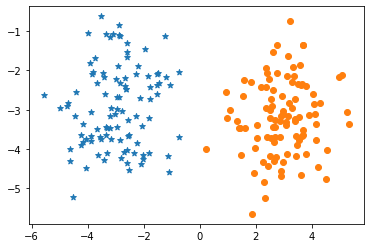

In [6]:
plt.scatter(c_0[:,0],c_0[:,1],marker='*')
plt.scatter(c_1[:,0],c_1[:,1])

In [7]:
All_data = np.concatenate((c_0,c_1))
np.random.shuffle(All_data)
All_data.shape

(200, 3)

In [8]:
train_data_X = All_data[:150,:2] # 取前150个做训练集，后50个作为测试集
train_data_y = All_data[:150,-1].reshape(150,1)
test_data_X = All_data[150:,:2]
test_data_y = All_data[150:,-1].reshape(50,1)
train_data_X.shape,train_data_y.shape,test_data_X.shape,test_data_y.shape

((150, 2), (150, 1), (50, 2), (50, 1))

In [9]:
W = np.zeros((2,1))
T = 100
# 特征，label，在第二个维度拼接
train_data = np.concatenate((train_data_X,train_data_y),axis=1)
train_data.shape

(150, 3)

In [10]:
# 训练模型
for t in range(T):
    np.random.shuffle(train_data)
    for i in range(len(train_data)):
        # 选择第 i 个样本
        pred = np.dot(W.T,(train_data[i][-1]*train_data[i][:2]).reshape(2,1))[0,0]
        if pred <= 0:
            W = W + (train_data[i][-1]*train_data[i][:2]).reshape(2,1)

In [15]:
W

array([[ 4.82450889],
       [-0.20314586]])

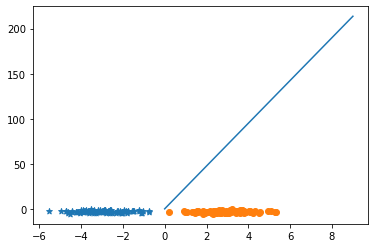

In [14]:
plt.scatter(c_0[:,0],c_0[:,1],marker='*')
plt.scatter(c_1[:,0],c_1[:,1])
x = np.arange(10)
y = -(W[0]*x)/W[1]
plt.plot(x,y)